## Importação de Bibliotecas

In [45]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [46]:
# Supress Scientific Notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

In [47]:
def settings():
    plt.rcParams['figure.figsize'] = [19, 9]
    plt.rcParams['figure.dpi'] = 100
    sns.set(font_scale = 1.4)

settings()

## Extração de dados

In [48]:
# carregando conjunto de dados
data = pd.read_csv('../datasets/kc_house_data.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180.00,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170.00,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770.00,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050.00,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680.00,0,1987,0,98074,47.62,-122.05,1800,7503


## Transformação dos dados

In [49]:
# Quantidade de linhas e colunas do dataframe
print(f'Número de linhas: {data.shape[0]}')
print(f'Número de colunas: {data.shape[1]}')

Número de linhas: 21613
Número de colunas: 21


In [50]:
# Qual o tipo de cada dado
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [51]:
# Garantir que o formato date é um datetime 
data['date'] = pd.to_datetime( data['date'], format='%Y-%m-%d' )

# Transformar as variaveis bathrooms e floors em inteiro
data['bathrooms'] = data['bathrooms'].astype('int64')
data['floors'] = data['floors'].astype('int64')

## Tratamento de dados faltantes

In [52]:
# Verificando dados faltantes
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [53]:
# Como só tenho dados faltantes em duas linhas, irei remove-las.
data.dropna(axis = 0, inplace = True)

# Estou assumindo que id's duplicadas são um erro de sistema, por isso irei remove-los do dataset.
data.drop_duplicates(subset=['id'], keep='first', inplace=True)

# Casas com 33 quartos parecem ser erro de digitação, por isto estou mudando para 3 quartos
data.loc[data['bedrooms'] == 33, 'bedrooms'] = 3

# Remoção de imóveis com zero banheiros pois não nos interessa imóveis sem banheiro
data.drop(data.loc[data['bathrooms'] == 0].index, axis = 0, inplace = True)

## Descrição estatistica dos dados

In [54]:
# Selecionando apenas os dados de tipo numerico
data_numerical = data.select_dtypes(include = ['float64', 'int64'])

# Realizando um drop na coluna 'id' pois não é uma informação que precisamos
data_numerical = data_numerical.drop('id', axis = 1)

# Criação do df com as estatisticas descritivas 
min_     = pd.DataFrame(data_numerical.apply(np.min))
max_     = pd.DataFrame(data_numerical.apply(np.max))
mean     = pd.DataFrame(data_numerical.apply(np.mean))
median   = pd.DataFrame(data_numerical.apply(np.median))
std      = pd.DataFrame(data_numerical.apply(np.std))
range_   = pd.DataFrame(data_numerical.apply(lambda x: x.max() - x.min()))
kurtosis = pd.DataFrame(data_numerical.apply(lambda x: x.kurtosis()))
skew     = pd.DataFrame(data_numerical.apply(lambda x: x.skew()))

data_desc = pd.concat([min_, max_, range_, mean, median, std, kurtosis, skew], axis = 1)
data_desc.columns = ['min', 'max', 'range', 'mean', 'median', 'std', 'kurtosis', 'skew']
data_desc

,min,max,range,mean,median,std,kurtosis,skew
price,78000.00,7700000.00,7622000.00,541441.08,450000.00,367940.84,34.62,4.03
bedrooms,0.00,11.00,11.00,3.38,3.00,0.90,1.85,0.56
bathrooms,1.00,8.00,7.00,1.76,2.00,0.73,2.04,0.96
sqft_living,390.00,13540.00,13150.00,2086.97,1920.00,917.50,5.29,1.48
sqft_lot,520.00,1651359.00,1650839.00,15122.71,7609.00,41584.24,283.95,13.05
floors,1.00,3.00,2.00,1.45,1.00,0.55,-0.57,0.71
waterfront,0.00,1.00,1.00,0.01,0.00,0.09,131.02,11.53
view,0.00,4.00,4.00,0.23,0.00,0.77,10.86,3.39
condition,1.00,5.00,4.00,3.41,3.00,0.65,0.51,1.05
grade,4.00,13.00,9.00,7.67,7.00,1.17,1.12,0.82


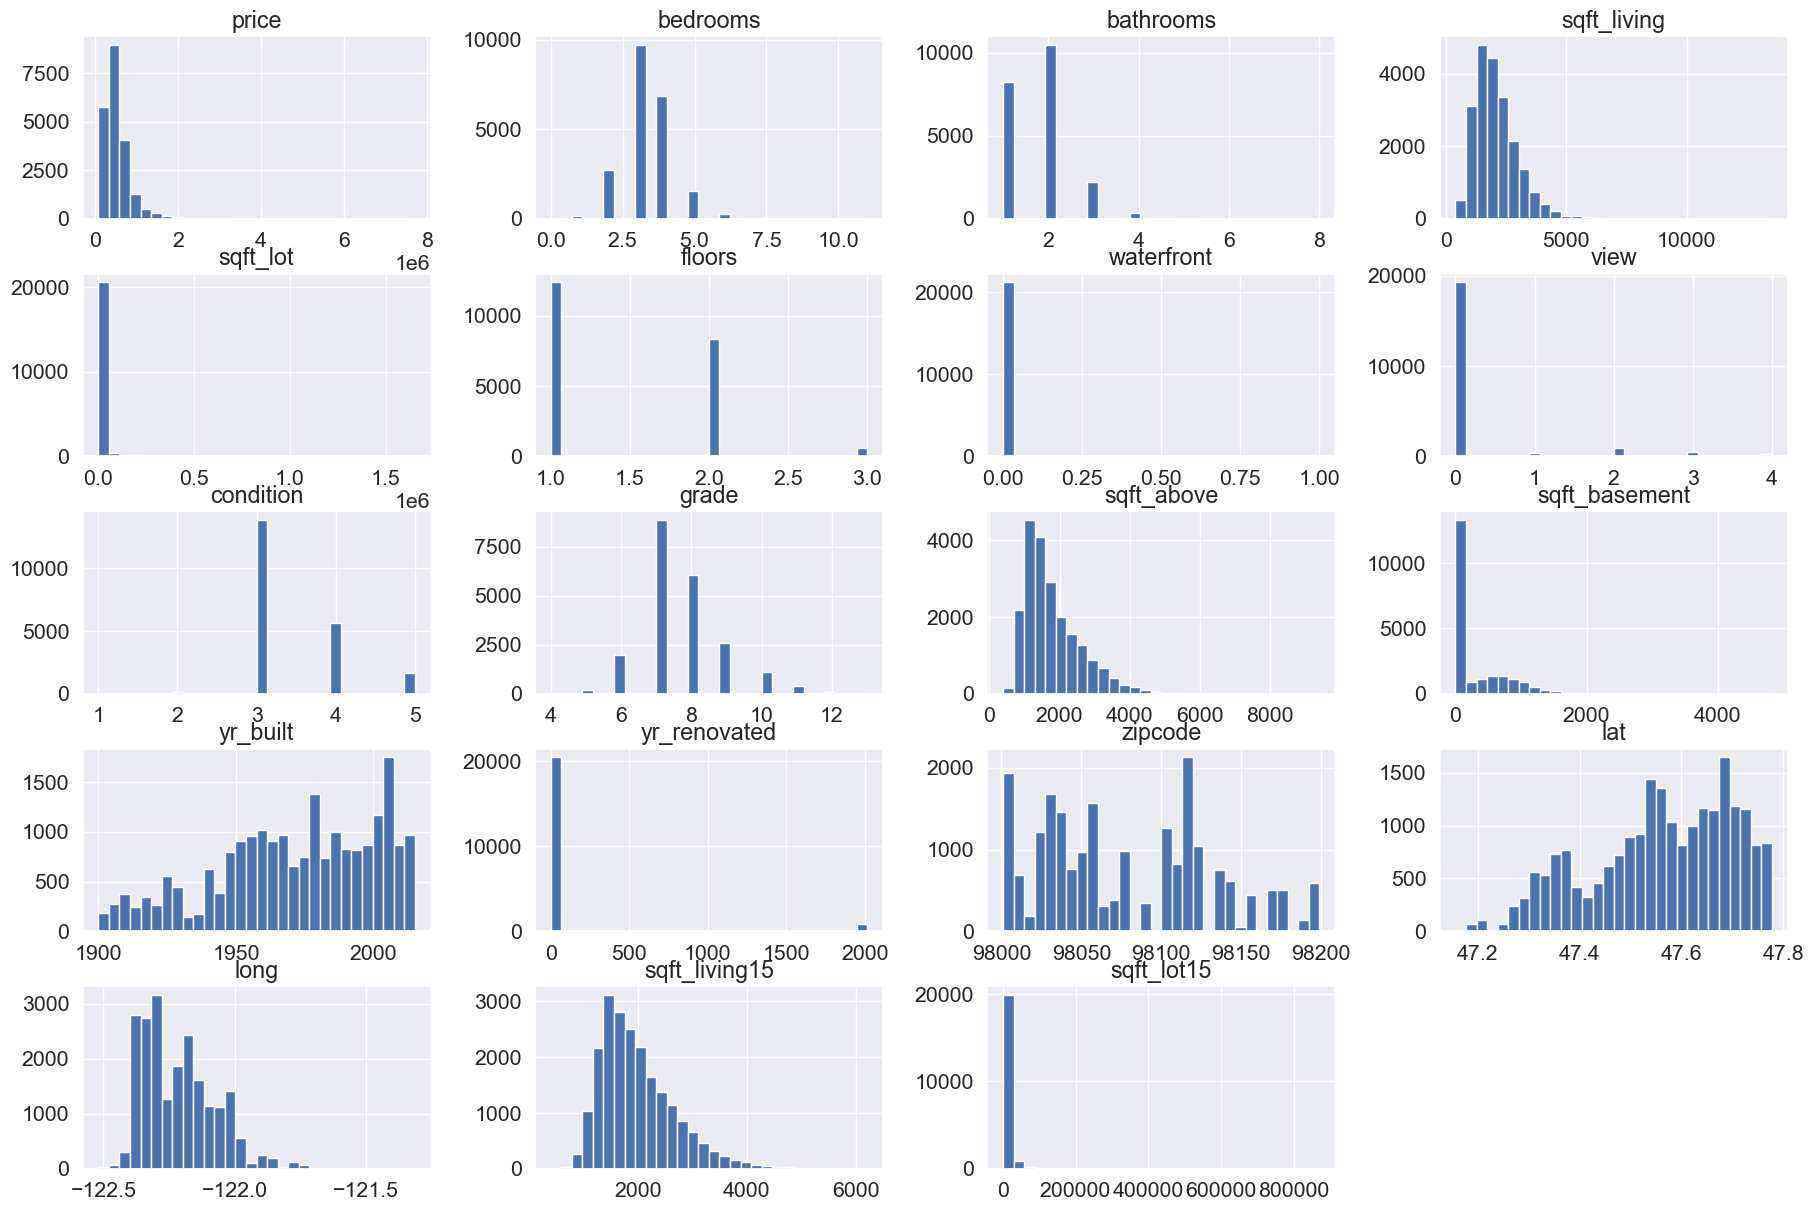

In [55]:
# Verificação da distribuição dos dados
data_numerical.hist(bins= 30, figsize = (22,15));

## Explicando cada atributo do dataframe 

| Nome         |Tradução            |Significado 
|:-------------|:-------            |:------------
|id            |id                  |Identificação única de cada imóvel do conjunto de dados      
|date          |data de venda       |Data em que foi realizado a venda do imóvel   
|price         |preço de venda      |Preço de venda de cada imóvel        
|bedrooms      |quartos             |Quantidade de quartos de cada imóvel        
|bathrooms     |banheiros           |Quantidade de banheiros de cada imóvel         
|sqft_living   |tamanho da casa     |Pés quadrados do espaço interior dos imóveis        
|sqft_lot      |tamanho do terreno  |Pés quadrados do espaço do terreno        
|floors        |andares             |Número de andares de cada imóvel        
|waterfront    |vista para agua     |Informa se o imóvel possuí vista para o mar ou não
|view          |vista               |Um indice de 0 a 4 de quão boa é a vista do imóvel
|conditions    |condições           |Um indice de 0 a 5 da condição em que o imóvel se encontra
|grade         |nivel de construção |Índice de 1 a 13, onde 1-3 fica aquém da construção e design de edifícios, 7 tem um nível médio de construção e design e 11-13 tem um alto nível de construção e design.
|sqft_above    |sotão               |Pés quadrados do espaço interno da habitação que está acima do nível do solo
|sqft_basement |porão               |Pés quadrados do espaço interno da habitação que está abaixo do nível do solo
|yr_built      |ano de construção   |Ano de construção do imóvel
|yr_renovated  |ano de reforma      |Ano em que foi feita a última reforma do imóvel
|zipcode       |código Postal       |Área do codigo postal onde os imóveis se localizam
|lat           |latitude            |Latitude
|long          |longitude           |Longitude
|sqft_living15 |sem tradução        |Pés quadrados do espaço habitacional interior para os 15 vizinhos mais próximos
|sqft_lot15    |sem tradução        |Pés quadrados dos lotes dos 15 vizinhos mais próximos


## Criação de novas features 

In [56]:
# Criação da feature 'reformado' indicando se o imóvel já sofreu alguma reforma desde sua construção
data['reformado'] = data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [57]:
# Criação da feature 'conditional_type'
data['conditional_type'] = data['condition'].apply( lambda x: 'bad' if x <= 2 else 
                                                              'regular' if (x == 3) | (x == 4) else 
                                                              'good' )

In [58]:
# Criação da feature 'year_month'
data['year_month'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')

In [59]:
# Criação da feature 'month'
data['month'] = pd.to_datetime(data['date']).dt.month

In [60]:
# Criação da feature 'sazonalidade
data['sazonalidade'] = data['month'].apply(lambda x: 'spring' if (x >= 3) & (x <= 5) else
                                                     'summer' if (x >= 6) & (x <= 8) else
                                                     'autumn' if (x >= 9) & (x <= 11) else
                                                     'winter')

In [61]:
# Criação da feature 'view_type'
data['view_type'] = data['view'].apply(lambda x: 'bad' if (x == 0) else
                                                 'regular' if (x == 1) | (x == 2) else
                                                 'good')

In [62]:
# Criação da feature 'menor_1955'
data['menor_1955'] = data['yr_built'].apply(lambda x: 0 if x < 1955 else 1)

In [63]:
# Criação da feature 'porao'
data['porao'] = data['sqft_basement'].apply(lambda x: 'não' if x == 0 else 'sim')

## Validação de Hipoteses

### H1:  Imóveis que possuem vista para água, são 30% mais caros, na média.

- **Hipotese confirmada!**
    * Casas com vista pro mar são até 220% mais caras na media

In [64]:
h1 = data[['waterfront', 'price']].groupby('waterfront').mean().reset_index()
h1['percentage'] = h1['price'].pct_change()*100

A diferença percentual é 220.76%


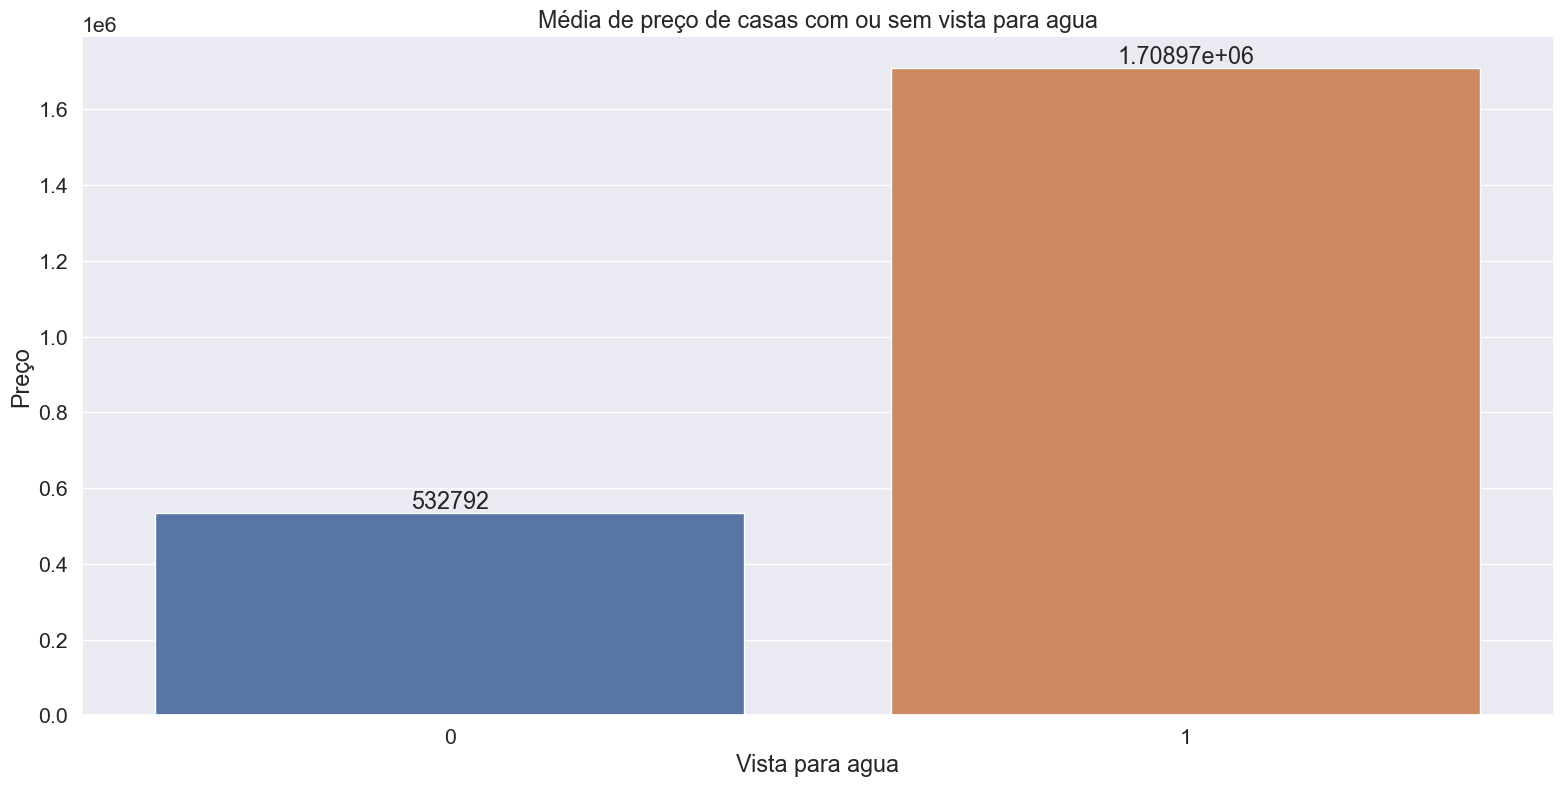

In [65]:
ax = sns.barplot(data = h1, x = 'waterfront', y = 'price')
ax.set(title = 'Média de preço de casas com ou sem vista para agua', xlabel = 'Vista para agua', ylabel = 'Preço');
ax.bar_label(ax.containers[0]);

print('A diferença percentual é {:.2f}%'.format(h1.loc[1,'percentage']))

### H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

- **Hipotese refutada!**
    * Imóveis com data de construção menor que 1955 não são mais baratos que os demais, o preço de ambos está muito próximo

In [66]:
h2 = data[['menor_1955', 'price']].groupby('menor_1955').mean().reset_index()
h2['percentage'] = h2['price'].pct_change()*100

A diferença percentual é 0.17%


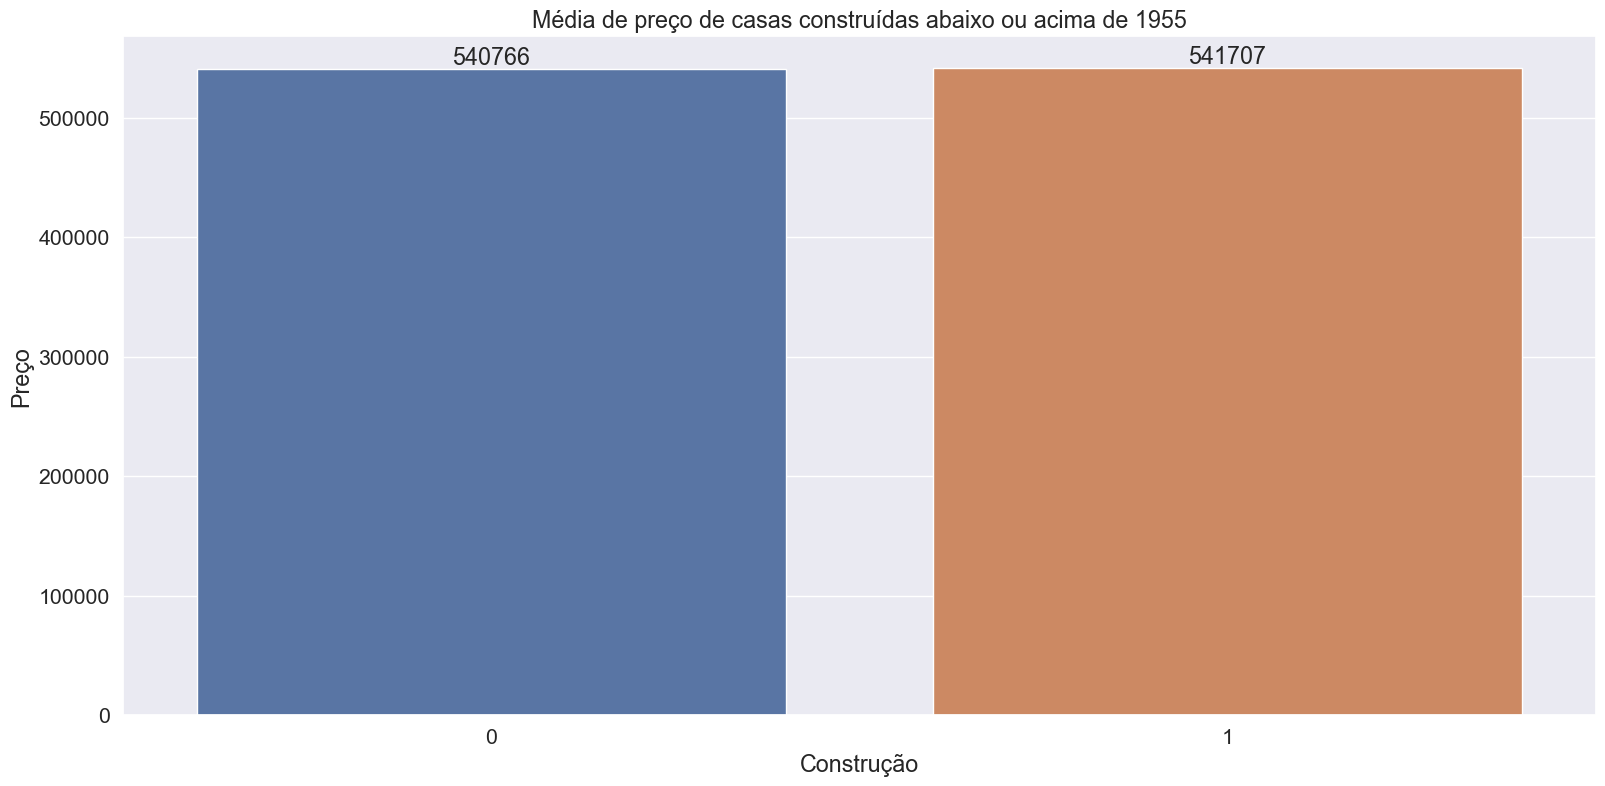

In [67]:
ax = sns.barplot(data = h2, x = 'menor_1955', y = 'price')
ax.set(title = 'Média de preço de casas construídas abaixo ou acima de 1955', xlabel = 'Construção', ylabel = 'Preço')
ax.bar_label(ax.containers[0]);

print('A diferença percentual é {:.2f}%'.format(h2.loc[1,'percentage']))

### H3: Imóveis sem porão possuem sqft_lot 40% maiores do que com porão.

- **Hipotese refutada!**
    * Imóveis sem porão possuem sqft_lot somente até 22% maiores do que com porão

In [68]:
h3 = data[['porao', 'sqft_lot']].groupby('porao').mean().sort_values('sqft_lot', ascending = True).reset_index()
h3['percentage'] = h3['sqft_lot'].pct_change()*100

A diferença percentual é 22.67%


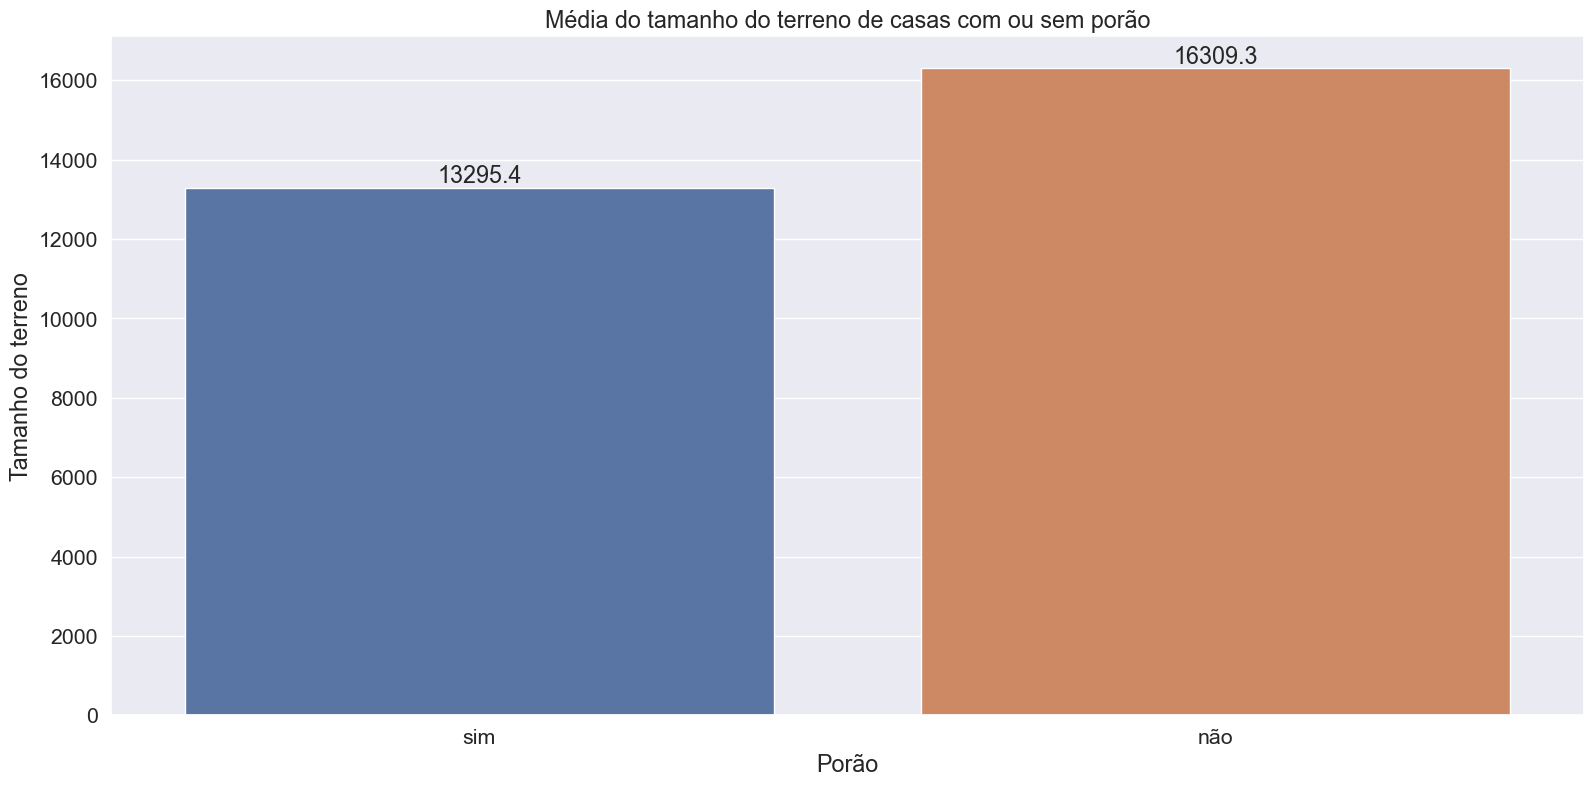

In [69]:
ax = sns.barplot(data = h3, x = 'porao', y = 'sqft_lot')
ax.set(title = 'Média do tamanho do terreno de casas com ou sem porão', xlabel = 'Porão', ylabel = 'Tamanho do terreno')
ax.bar_label(ax.containers[0]);

print('A diferença percentual é {:.2f}%'.format(h3.loc[1,'percentage']))

### H4: Imóveis de todas as condições valorizam pelo menos 10% ao ano no total

- **Hipotese refutada!**
    * Independente das condições, ao longo do ano todos os imóveis sofreram uma desvalorização outro ano

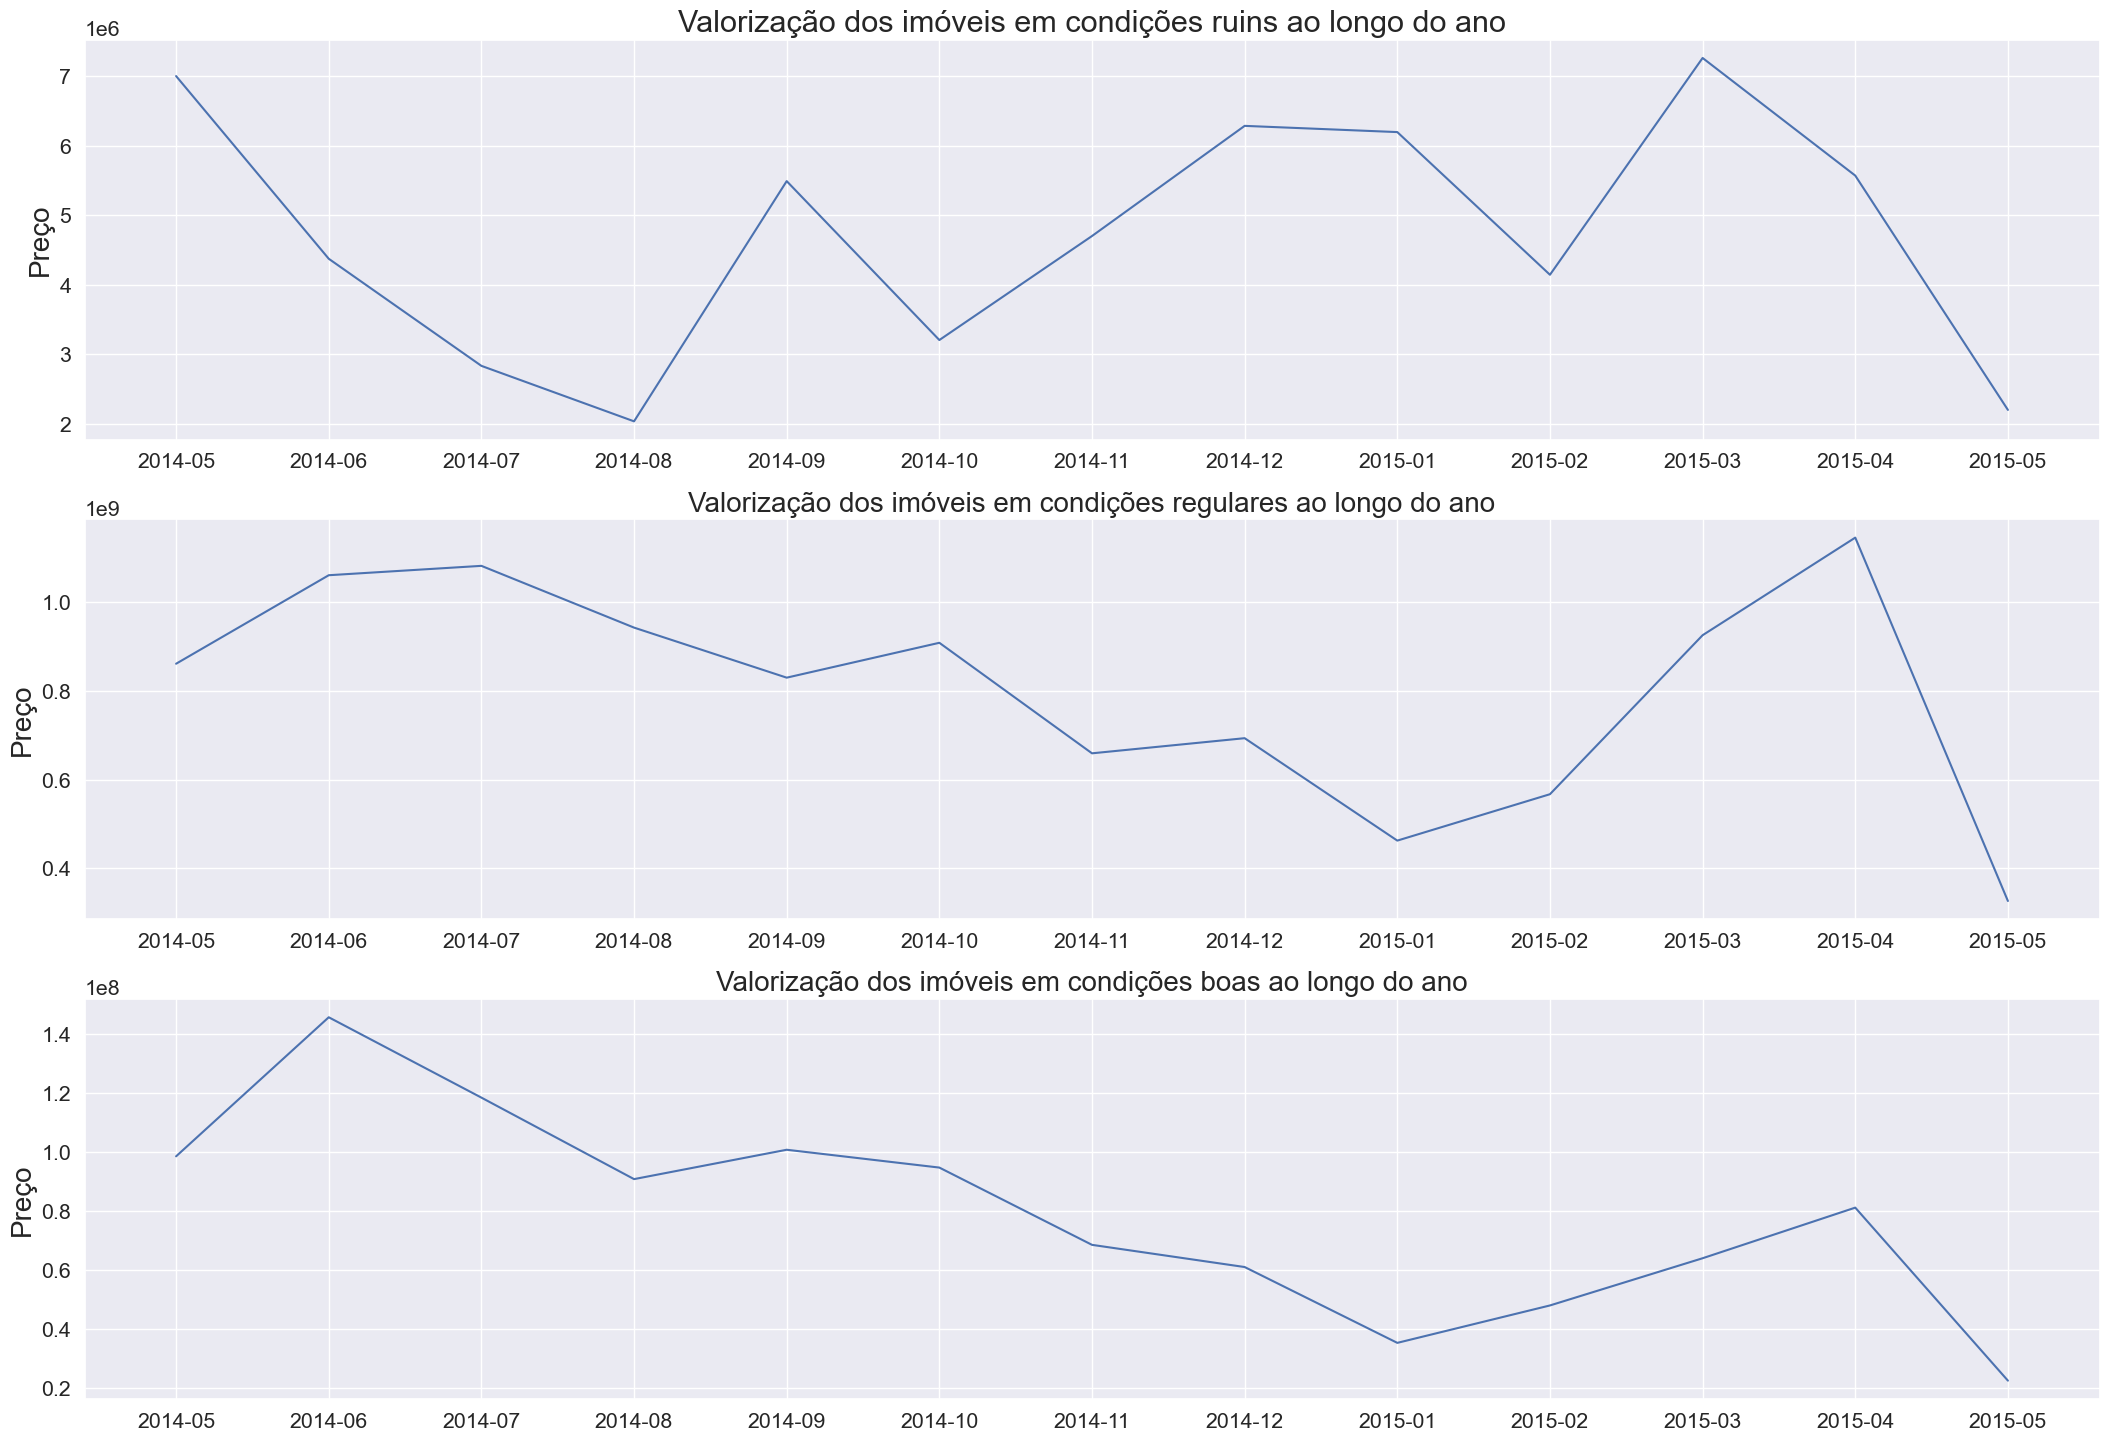

In [70]:
fig = plt.figure( figsize=(26, 18) )
specs = gridspec.GridSpec( ncols=1, nrows=3, figure=fig )

ax1 = fig.add_subplot( specs[0,0] ) # First Row
ax2 = fig.add_subplot( specs[1,0] ) # First Row First Column
ax3 = fig.add_subplot( specs[2,0] ) # Second Row First Column

# Frist Graph
h4_bad = data.loc[data['conditional_type'] == 'bad', ['conditional_type', 'year_month', 'price']]
h4_bad = h4_bad.groupby(['year_month', 'conditional_type']).sum().reset_index()

h4_bad = sns.lineplot( x='year_month', y='price', data= h4_bad, ax = ax1);

h4_bad.set(title = 'Valorização dos imóveis em condições ruins ao longo do ano', xlabel = '', ylabel = 'Preço')
h4_bad.title.set_size(22)
h4_bad.set_ylabel('Preço', fontsize = 20)


# Second Graph
h4_regular = data.loc[data['conditional_type'] == 'regular', ['conditional_type', 'year_month', 'price']]
h4_regular = h4_regular.groupby(['year_month', 'conditional_type']).sum().reset_index()

h4_regular = sns.lineplot( x='year_month', y='price', data= h4_regular, ax = ax2);

h4_regular.set(title = 'Valorização dos imóveis em condições regulares ao longo do ano', xlabel = '', ylabel = 'Preço')
h4_regular.title.set_size(20)
h4_regular.set_ylabel('Preço', fontsize = 20)


# Third Graph
h4_good = data.loc[data['conditional_type'] == 'good', ['conditional_type', 'year_month', 'price']]
h4_good = h4_good.groupby(['year_month', 'conditional_type']).sum().reset_index()

h4_good = sns.lineplot( x='year_month', y='price', data= h4_good, ax = ax3)

h4_good.set(title = 'Valorização dos imóveis em condições boas ao longo do ano', xlabel = '')
h4_good.title.set_size(20)
h4_good.set_ylabel('Preço', fontsize = 20);

### H5: Imóveis com vista 'regular' são mais são 30% mais baratos do que com vista 'boa'

- **Hipotese confirmada!**
    * Imóveis com vista regular são até 45% mais baratos do que imóveis com uma vista boa

In [71]:
h5 = data[['view_type', 'price']].groupby('view_type').mean().sort_values('price', ascending = True).reset_index()
h5 = h5.loc[h5['view_type'] != 'bad']
h5['percentage'] = h5['price'].pct_change()*100

A diferença percentual é 45.49%


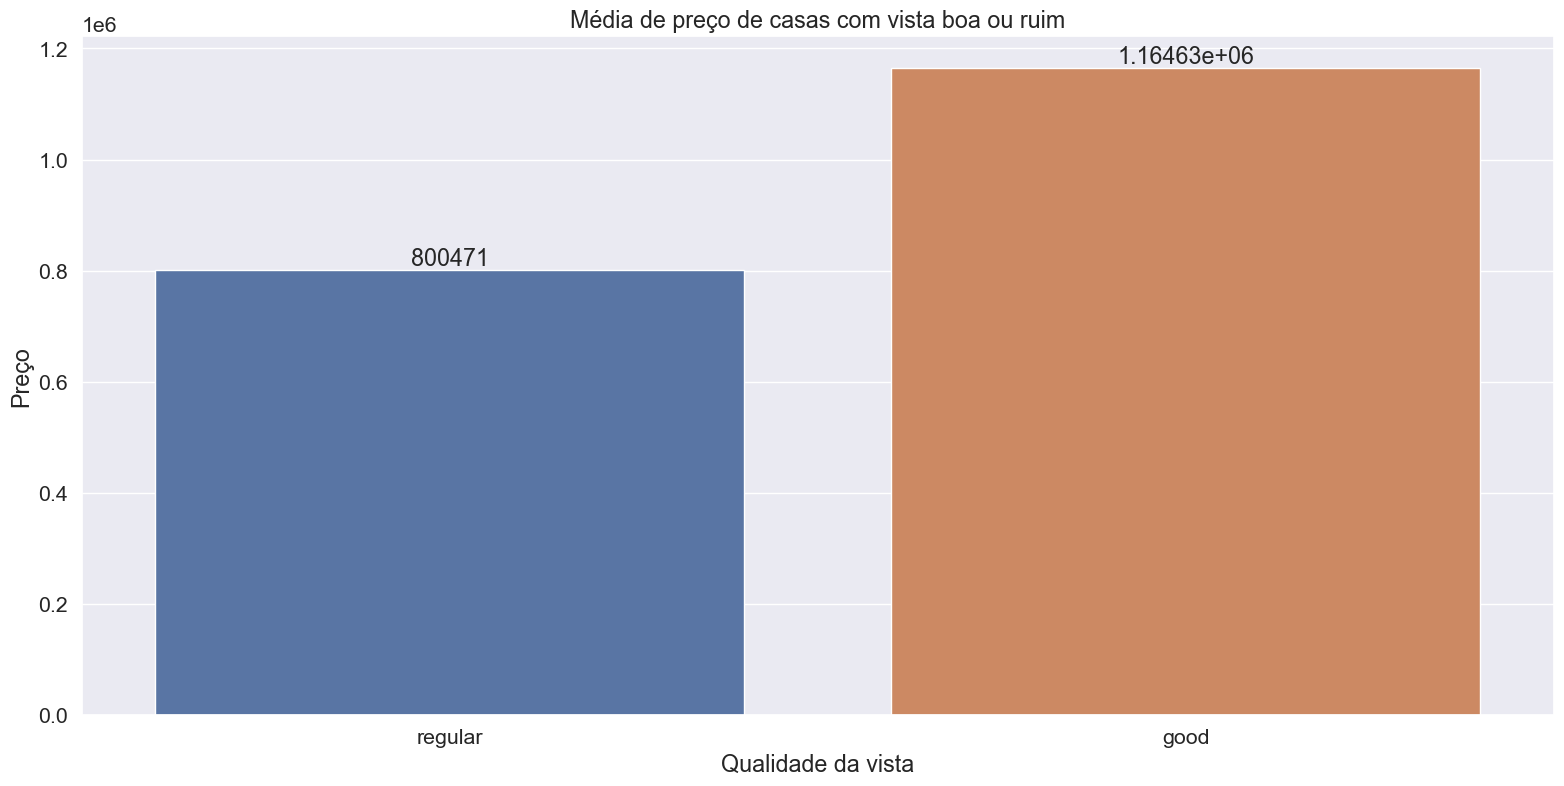

In [72]:
ax = sns.barplot(data = h5, x = 'view_type', y = 'price')

ax.set(title  = 'Média de preço de casas com vista boa ou ruim',
       xlabel = 'Qualidade da vista', 
       ylabel = 'Preço')

ax.bar_label(ax.containers[0]);

print('A diferença percentual é {:.2f}%'.format(h5.loc[2,'percentage']))

### H6: Imóveis que nunca foram reformados são 20% mais baratos do que imóveis que nunca tiveram reforma

- **Hipotese confirmada!**
    * Imóveis que nunca foram reformados são até 43% mais baratos do que imóveis que já passaram por alguma reforma

In [73]:
h6 = data[['reformado', 'price']].groupby('reformado').mean().reset_index()
h6['percentage'] = h6['price'].pct_change()*100

A diferença percentual é 43.66%


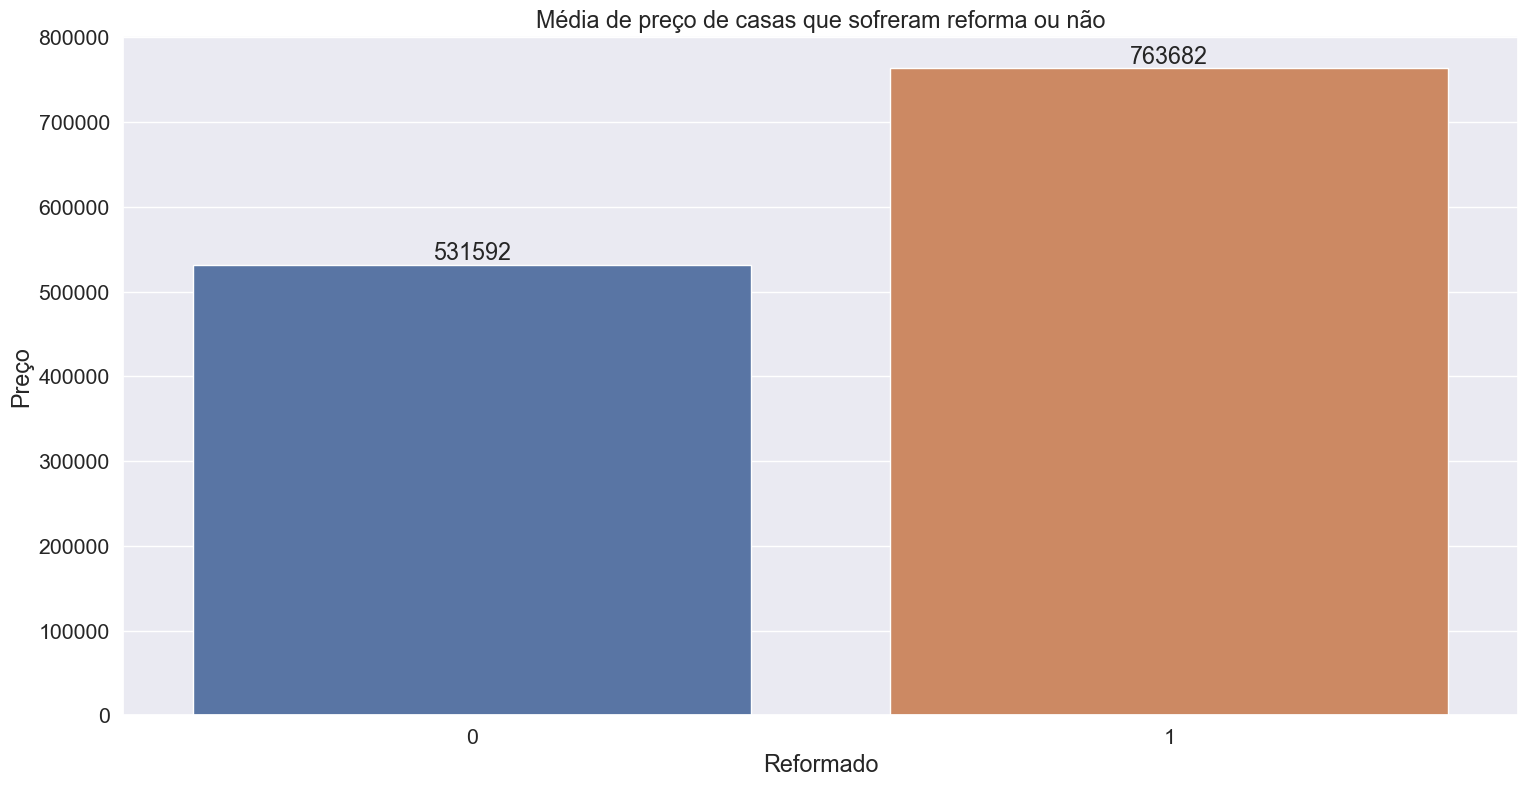

In [74]:
plt.figure(figsize = (18, 9))

ax = sns.barplot(data = h6, x = 'reformado', y = 'price')

ax.set(title  = 'Média de preço de casas que sofreram reforma ou não',
       xlabel = 'Reformado', 
       ylabel = 'Preço')

ax.bar_label(ax.containers[0]);

print('A diferença percentual é {:.2f}%'.format(h6.loc[1,'percentage']))

### H7: Imóveis no inverno sofrem uma desvalorização de 20% no preço total com relação ao outono

- **Hipotese confirmada!**
    * Imóveis no inverno sofrem uma desvalorização de quase 30% no preço total com relação ao outono

In [75]:
h7 = data[['sazonalidade', 'year_month', 'price']].groupby(['year_month', 'sazonalidade']).sum().reset_index()

Diferença percentual: 30%


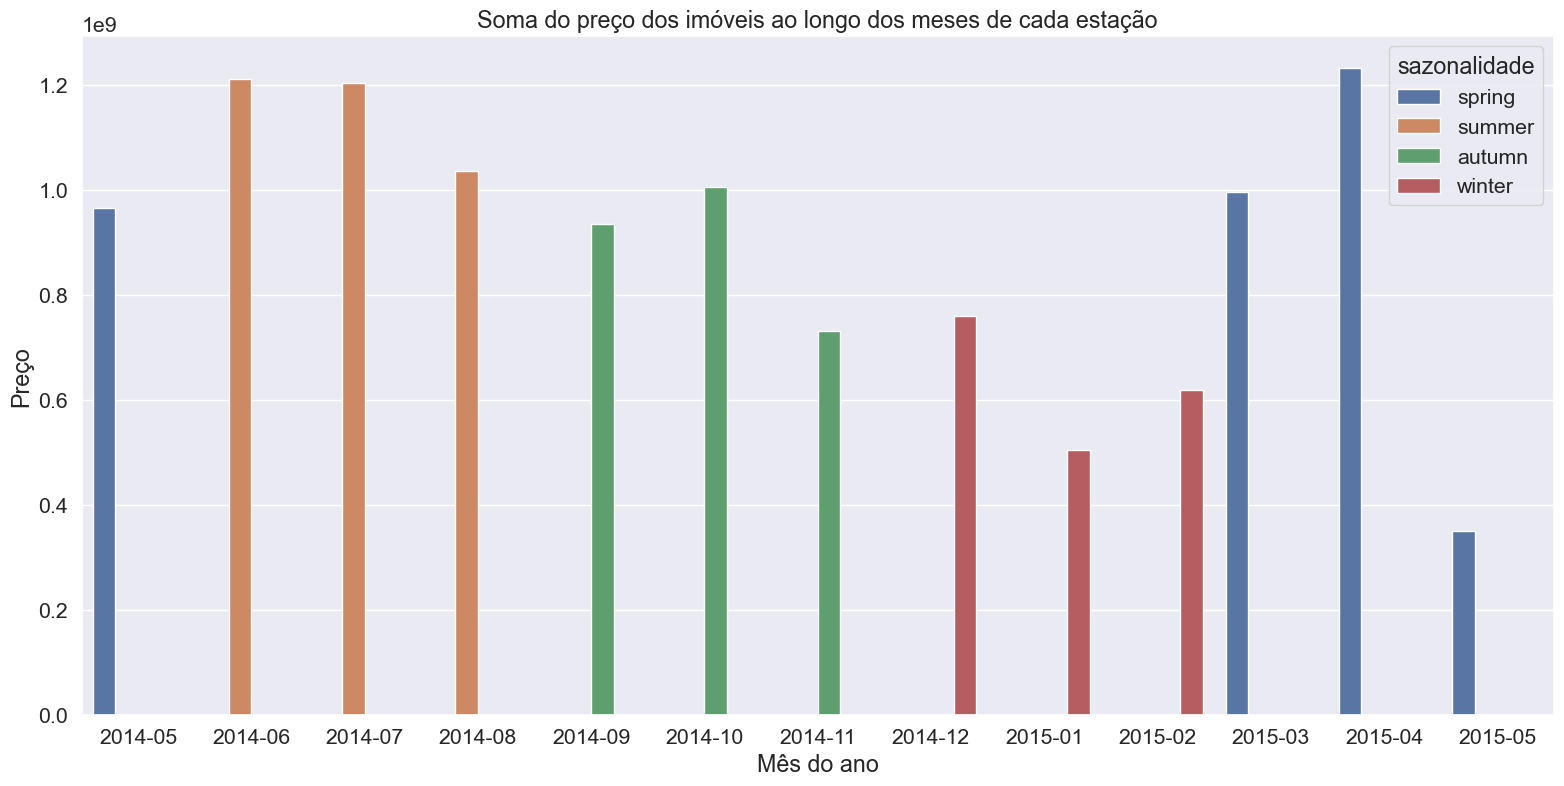

In [76]:
ax = sns.barplot(data = h7, x = 'year_month', y = 'price', hue = 'sazonalidade' )

ax.set(title  = 'Soma do preço dos imóveis ao longo dos meses de cada estação',
       xlabel = 'Mês do ano', 
       ylabel = 'Preço');

autumn_sum = data.loc[ (data['year_month'] >= '2014-09') & (data['year_month'] <= '2014-11'), 'price'].sum()
winter_sum = data.loc[ (data['year_month'] >= '2014-12') & (data['year_month'] <= '2015-02'), 'price'].sum()


print(f'Diferença percentual: 30%')

### H8: Imóveis no verão tem uma valorização de 20% no preço total com relação a primavera

- **Hipotese refutada!**
    * Imóveis no verão sofrem uma desvalorização de quase 3% no preço total com relação a primavera, os preços são muito similares.

In [77]:
h8 = data[['sazonalidade', 'price']].groupby('sazonalidade').sum().sort_values('price', ascending = False).reset_index()
h8['percentage'] = h8['price'].pct_change()*100

A diferença percentual é -2.76%


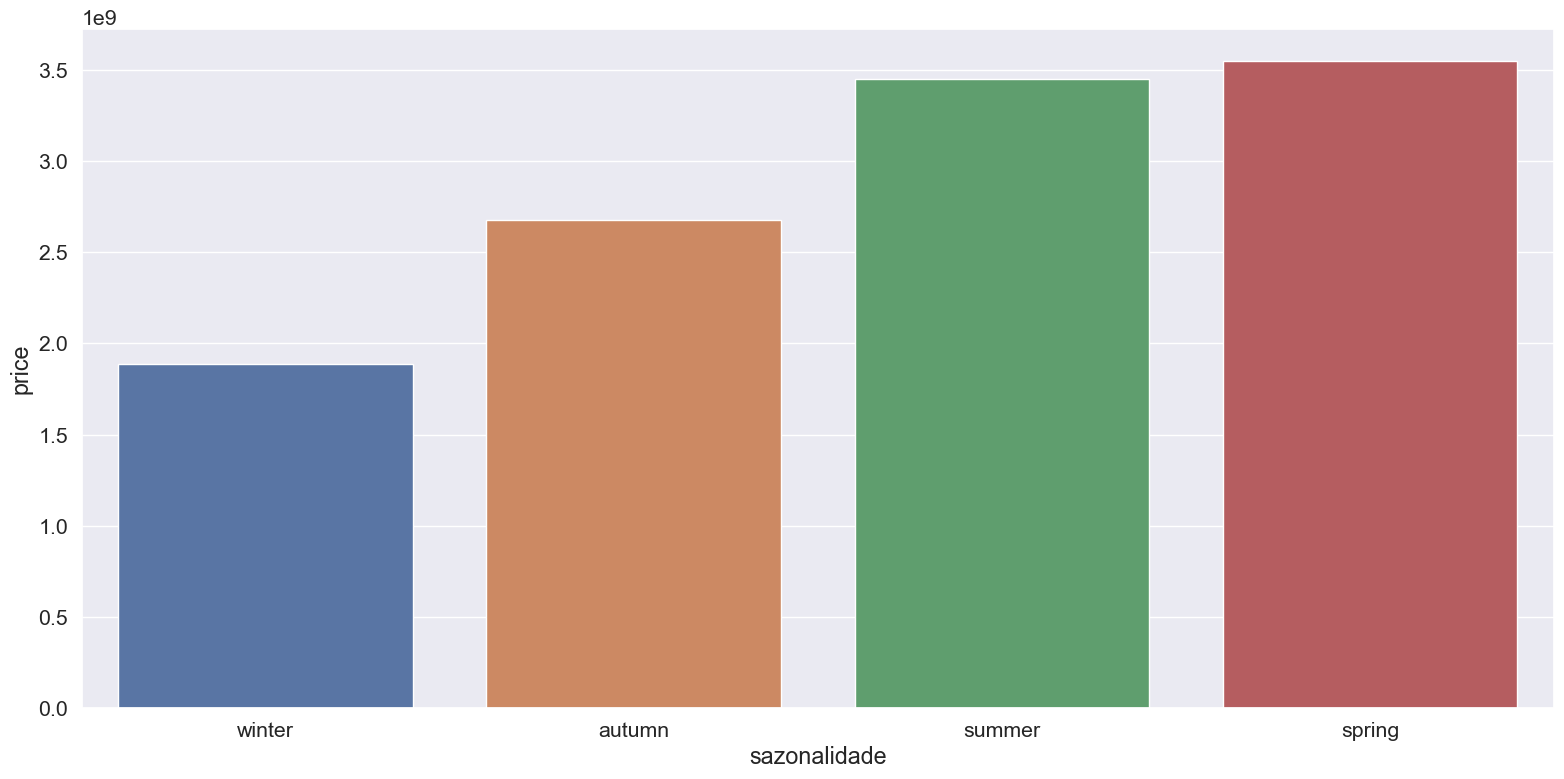

In [78]:
ax = sns.barplot(data = h8, x = 'sazonalidade', y = 'price',
                 order = h8.sort_values('price', ascending=True)['sazonalidade'])


print('A diferença percentual é {:.2f}%'.format(h8.loc[1,'percentage']))

## Questões de negócio

### Quais os imóveis que a House Rocket deveria comprar e por qual preço?

* Agrupar os dados por região (ZIPCODE)
* Dentro de cada região, eu vou encontrar a mediana dos preços dos imóveis
* Vou sugerir que os imóveis que estão abaixo do preço mediano de cada região e que estejam em boas condições, sejam comprados. 
* Vou também verificar a economia praticada na compra desses imóveis

In [79]:
# Separando as variaveis que irei usar para construção da minha tabela de compra
df_compra = data.copy()

# Encontrando a mediana do preço dentro de cada região
df_compra_grouped = df_compra[['zipcode', 'price']].groupby('zipcode').median().reset_index()
df_compra_grouped.columns = ['zipcode', 'median_price']

# Juntando meus dataframes
df_compra = pd.merge(df_compra, df_compra_grouped, on = 'zipcode', how = 'inner')

In [80]:
# Criação da feature que me indicará se o imóvel deve ser comprado ou não, sendo 1 = comprar e 0 = não comprar
df_compra['status'] = 'NA'


for i in range( len( df_compra ) ):
    if (df_compra.loc[i, 'price'] < df_compra.loc[i, 'median_price']) & (df_compra.loc[i, 'condition'] >= 4) & (df_compra.loc[i, 'bedrooms'] >= 2)  & (df_compra.loc[i, 'floors'] >= 2):
        df_compra.loc[i, 'status'] = 1
    else:
        df_compra.loc[i, 'status'] = 0

In [81]:
# Criando a feature 'economia' que me indicará quanto economizei na compra do imóvel baseados no preço e preço mediano
df_compra['economia'] = df_compra[['price', 'median_price']].apply(lambda x: x['median_price'] - x['price'], axis = 1)

In [82]:
# Selecionando apenas meus imóveis que estão aptos para compra
df_compra = df_compra.loc[df_compra['status'] == 1, :].copy()
tabela_compra = df_compra[['id', 'zipcode', 'price', 'median_price', 'condition', 'status', 'economia']].copy()


In [83]:
display(tabela_compra.head())

print(f'Quantidade de imóveis aptos para compra: {tabela_compra.shape[0]}')
print(f'Custo de compra de todos os imóveis: {tabela_compra.price.sum()}')
print(f'Economia total na compra dos imóveis: {tabela_compra.economia.sum()}')

,id,zipcode,price,median_price,condition,status,economia
304,6381501636,98125,320000.00,425000.00,4,1,105000.00
740,3582750280,98028,347000.00,445000.00,4,1,98000.00
746,3582750170,98028,410000.00,445000.00,4,1,35000.00
805,3816300105,98028,435000.00,445000.00,4,1,10000.00
830,3582750120,98028,409000.00,445000.00,4,1,36000.00


Quantidade de imóveis aptos para compra: 373
Custo de compra de todos os imóveis: 179537408.0
Economia total na compra dos imóveis: 33658210.0


### Uma vez o imóvel comprado, qual melhor momento para vende-lo e por qual preço?

* Agrupar os imóveis por região (zipcode) e por sazonalidade (Summer, Winter)
* Dentro de cada região e sazonalidade, eu vou calcular a mediana de preço.

* Se o preço da compra for **maior** de a mediana da região e sazonalidade. O preco de venda é igual ao preço de compra + 10%.
* Se o preço da compra for **menor** de a mediana da região e sazonalidade. O preco de venda é igual ao preço de compra + 30%.

In [84]:
df_venda = df_compra[['id', 'price', 'zipcode', 'sazonalidade']].copy()

df_grouped_venda = df_venda[['zipcode', 'sazonalidade', 'price']].groupby(['zipcode', 'sazonalidade']).median().reset_index()
df_grouped_venda.columns = ['zipcode', 'sazonalidade', 'median_price']

In [85]:
df_venda = pd.merge(df_venda, df_grouped_venda, on = ['zipcode', 'sazonalidade'], how = 'inner')

In [86]:
df_venda['preco_venda'] = df_venda[['median_price','price']].apply(lambda x: 
                                                                    (x['price']*1.1) if x['price'] >= x['median_price'] else                                                                       (x['price']*1.3), axis=1)

In [87]:
df_venda['lucro_venda'] = df_venda['preco_venda'] - df_venda['price']

In [88]:
lucro_por_estacao = df_venda[['sazonalidade', 'preco_venda']].groupby('sazonalidade').sum().reset_index()

display(df_venda.head())
display(lucro_por_estacao)
print(f'Valor obtido pela venda de todos os imóveis adquiridos: {round(df_venda.preco_venda.sum())}')
print(f'Lucro das vendas considerando a compra dos imóveis e depois a revenda: {round(df_venda.lucro_venda.sum())}')

,id,price,zipcode,sazonalidade,median_price,preco_venda,lucro_venda
0,6381501636,320000.00,98125,summer,320000.00,352000.00,32000.00
1,3582750280,347000.00,98028,spring,378500.00,451100.00,104100.00
2,3582750170,410000.00,98028,spring,378500.00,451000.00,41000.00
3,3816300105,435000.00,98028,winter,435000.00,478500.00,43500.00
4,3582750120,409000.00,98028,summer,409000.00,449900.00,40900.00


,sazonalidade,preco_venda
0,autumn,49933865.60
1,spring,49399426.00
2,summer,78222913.50
3,winter,31764003.30


Valor obtido pela venda de todos os imóveis adquiridos: 209320208
Lucro das vendas considerando a compra dos imóveis e depois a revenda: 29782800
